# Import relevant libraries

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.linalg import expm
from numpy import linalg as LA

# Define Pauli matricies

The following functions are used to define Pauli matrices for and $N$ site system

In [39]:
# ---------------  Kroneker product formula ---------- #
########################################################
# The following allows you to define the KP between
# multiple matrices 
def kronie(arr_list):
    for i in range(0,len(arr_list)-1):
        arr_list[i+1] = np.kron(arr_list[i],arr_list[i+1])
        
    
    return arr_list[-1]
########################################################
########################################################

# ---------------  Dot product formula --------------- #
########################################################
# The following allows yous to define the matrix product
# between multiple matrices
def dot(arr_list):
    for i in range(0,len(arr_list)-1):
        arr_list[i+1] = np.dot(arr_list[i],arr_list[i+1])
        
    
    return arr_list[-1]
########################################################
########################################################

########################################################
########################################################
# Note!!
# In the following we define Pauli matrices
# n = total number of sites
# pos = position of pauli matrix @ site i
########################################################
########################################################

# -------------------  Sx operator ------------------- #
########################################################
def Sx_op(n,pos):
    sx = np.array([[0,1],[1,0]])
    sy = np.array([[0,-1j],[1j,0]])
    sz = np.array([[1,0],[0,-1]])

    a = [0 for i in range(n)]
    
    # Append identity to left
    for i in range(0,pos):
        a[i] = np.identity(2)
        
    # Append identity to right
    for i in range(pos+1,n):
        a[i] = np.identity(2)
    
    # Append Sx to pos
    a[pos] = sx
    
    return kronie(a)
########################################################
########################################################

# -------------------  Sz operator ------------------- #
########################################################
def Sz_op(n,pos):
    sx = np.array([[0,1],[1,0]])
    sy = np.array([[0,-1j],[1j,0]])
    sz = np.array([[1,0],[0,-1]])

    a = [0 for i in range(n)]
    
    # Append identity to left
    for i in range(0,pos):
        a[i] = np.identity(2)
        
    # Append identity to right
    for i in range(pos+1,n):
        a[i] = np.identity(2)
    
    # Append Sx to pos
    a[pos] = sz
    
    return kronie(a)
########################################################
########################################################

# -------------------  Sy operator ------------------- #
########################################################
def Sy_op(n,pos):
    sx = np.array([[0,1],[1,0]])
    sy = np.array([[0,-1j],[1j,0]])
    sz = np.array([[1,0],[0,-1]])

    a = [0 for i in range(n)]
    
    # Append identity to left
    for i in range(0,pos):
        a[i] = np.identity(2)
        
    # Append identity to right
    for i in range(pos+1,n):
        a[i] = np.identity(2)
    
    # Append Sx to pos
    a[pos] = sy
    
    return kronie(a)
########################################################
########################################################

#########################################################
# The above code was written by George Mihailescu in 2022
#########################################################

## Landau Zener Hamiltonian and CD term

## Example: The Landau-Zener model

We consider a two-level system given by the Hamiltonian
\begin{equation}
H(t) = \Delta\sigma^x + \nu(t)\sigma^z,
\end{equation}
where $\Delta$ sets the energy splitting, and the control field $\nu(t)$ couples the two levels. The identity and the Pauli matrices are defined as

\begin{equation}
\boldsymbol{1}=\begin{pmatrix}
1 & 0 \\ 0 & 1
\end{pmatrix}
,\qquad
\sigma^x=\begin{pmatrix}
0 & 1 \\ 1 & 0
\end{pmatrix}
,\qquad
\sigma^y=\begin{pmatrix}
0 & -i \\ i & 0
\end{pmatrix}
,\ \qquad
\sigma^z=\begin{pmatrix}
1 & 0 \\ 0 & -1
\end{pmatrix}.
\end{equation}

Its simplicity notwithstanding, the LZ model captures a remarkably diverse range of physical phenomena. Relveant to many-body physics, it captures the central aspects of critical systems and in particular two-band models. The corresponding eigenstates and eigenergies can be written:

\begin{equation}
|\phi_g \rangle = \cos{(\theta/2)}|0\rangle + \sin{(\theta/2)}|1\rangle\;, \quad E_g = -\sqrt{\Delta^2 + v(t)^2} 
\end{equation}
\begin{equation}
|\phi_e \rangle = \sin{(\theta/2)}|0\rangle - \cos{(\theta/2)}|1\rangle\;, \quad E_g = \sqrt{\Delta^2 + v(t)^2} 
\end{equation}

with $\tan{(\theta)} = \frac{\Delta}{v(t)}$. The counterdiabatic Hamiltonian follows from Eq.(14) of the main text and is given by:

\begin{equation}
\mathcal{A} = i\left( \frac{|\phi_g\rangle\langle \phi_g| \partial_t v(t) \sigma^z |\phi_e \rangle \langle \phi_e|}{E_g - E_e}  + \frac{|\phi_e\rangle\langle \phi_e| \partial_t v(t) \sigma^z |\phi_g \rangle \langle \phi_g|}{E_g - E_e} \right)
\end{equation}
which after a few manipulations yields
\begin{equation}
H_\text{CD}(t) = \Delta\sigma^x + \nu(t)\sigma^z - \frac{1}{2}\frac{\Delta\; \dot\nu(t)}{\Delta^2 + \nu^2(t)}\sigma^y.
\end{equation}

### What we do next
In the following we will compute the time dependence of the energy eigenvalues for the Landau-Zener model (shown in the solid black line) and for the controlled evolution according to $H_{CD}$ computed above for a linear ramp $v(t) = - 5 + 10 \frac{t}{T}$ and $\Delta = 1$ reproducing Figure 2 of the main text. Note here that $T$ denotes the total ramp durating time and $t$ represents a specific instance in time.




In [40]:
#########################################################
# Step 1: Define the Hamiltonian of the Landau-Zener model
#########################################################
# ham_lz = function which computes the Landau-Zener Hamiltonian
# d = energy gap Delta
# t = instant in time
# T = total time duration of ramp

def ham_lz(d,t,T):
    # v = definition of the linear ramp used in Eq. of the main text
    v = -5 + 10*(t/T)
    return d*Sx_op(1,0) + v*Sz_op(1,0)
#########################################################
#########################################################

#########################################################
# Step 2: compute the Landau-Zener Hamiltonian with the CD term
#########################################################
def ham_lz_CD(d,t,T):
    v = -5 + 10*(t/T)
    
    return d*Sx_op(1,0) + v*Sz_op(1,0) - ((d*(10/T))/(2*(d**2 + v**2)))*Sy_op(1,0)
#########################################################
#########################################################


# ----------------- Computation ----------------- #
###################################################
# Create list where eigenvalues will be appended to 
# at different increpemnts in time
# for the LZ model *with* control
eval_LZCD_t05_g = np.zeros(100)
eval_LZCD_t05_e = np.zeros(100)
eval_LZCD_t1_g = np.zeros(100)
eval_LZCD_t1_e = np.zeros(100)

# Create list where eigenvalues will be appended to 
# at different increpemnts in time
# for the LZ model with no control
eval_LZ_g = np.zeros(100)
eval_LZ_e = np.zeros(100)

# Create list of time increments
ts1 = np.linspace(0,1,100)
ts05 = np.linspace(0,0.5,100)

for i in tqdm(range(0,100)):
    # Delta = 1 throughout
    delta = 1
    T1 = 0.5 #quicker ramp
    T2 = 1 #slower ramp
    t1 = ts05[i]
    t2 = ts1[i]
    
    # Compute LZ with control
    eval_LZCD_t05_g[i] = LA.eigh(ham_lz_CD(delta,t1,T1))[0][0]
    eval_LZCD_t05_e[i] = LA.eigh(ham_lz_CD(delta,t1,T1))[0][1]
    eval_LZCD_t1_g[i] = LA.eigh(ham_lz_CD(delta,t2,T2))[0][0]
    eval_LZCD_t1_e[i] = LA.eigh(ham_lz_CD(delta,t2,T2))[0][1]
    
    # Compute LZ with no control
    eval_LZ_g[i] = LA.eigh(ham_lz(delta,t2,T2))[0][0]
    eval_LZ_e[i] = LA.eigh(ham_lz(delta,t2,T2))[0][1]
    
    

100%|██████████| 100/100 [00:00<00:00, 6457.94it/s]


# Recreate Figure 2

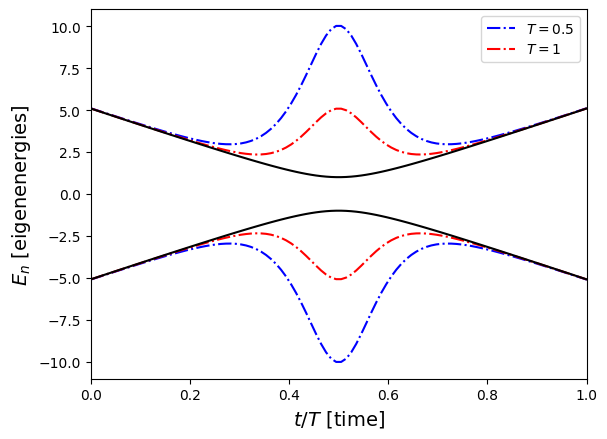

In [41]:
plt.plot(ts05/T1,eval_LZCD_t05_g,color = 'blue',linestyle = '-.',label = r'$T = 0.5$')
plt.plot(ts05/T1,eval_LZCD_t05_e,color = 'blue',linestyle = '-.')
plt.plot(ts1/T2,eval_LZCD_t1_g,color = 'red',linestyle = '-.',label = r'$T = 1$')
plt.plot(ts1/T2,eval_LZCD_t1_e,color = 'red',linestyle = '-.')


plt.plot(ts1/T2,eval_LZ_g,color = 'k')
plt.plot(ts1/T2,eval_LZ_e,color = 'k')
plt.legend()
plt.xlim(0,1)
plt.xlabel(r'$t/T$$~\left[\rm{time}\right]$',fontsize=14)
plt.ylabel(r'$E_n~\left[\rm{eigenenergies}\right]$',fontsize=14)
plt.show()

# Ising model Hamiltonian 




The transverse field nearest-neighbour Ising model describes a collection of interacting spin-$1/2$ degrees of freedom on a lattice under the action of a transverse field. We consider the 1D Ising model

\begin{equation}
H = - \sum_{j=1}^N \left( \sigma_j^x \sigma_{j+1}^x + g \sigma_j^z \right)
\end{equation}

We begin by constructing the Hamiltonian and determining the time evolution for a simple linear ramp $g(t)=0.1+1.9 t/T$.

In [42]:
#########################################################
# Step 1: Define the Hamiltonian of the Ising model
#########################################################
# ising = function which computes the Ising Hamiltonian
# g0 = FILL IN
# gd = FILL in
# T = total time duration of ramp
# n = total number of spins 

def ising(g0,gd,T,t,n):
    g = (g0 + gd*(t/T))
    sx_sx = 0
    for i in range(0,n-1):
        sx_sx += dot([Sx_op(n,i),Sx_op(n,i+1)])
        
    
    sz_tot = 0  
    for i in range(0,n):
        sz_tot += Sz_op(n,i)
            
    PBC_sx = dot([Sx_op(n,n-1),Sx_op(n,0)])
    
    return -(g*sz_tot + sx_sx +PBC_sx)
#########################################################
#########################################################



# Bare Hamiltonian evolution

In [43]:
# --------------------- Computation ------------------- #
#########################################################
# Define the parameters 

g0 = 0.1
gd = 1.9
T = 1      # ramp duration
dt = T/100 # time increment used in trotterized dynamics
n = 4 # number of spins

# -------------------------------------------------------- #
# create an empty list where ground states will be appended to
# we will keep 101 ground states in this example
# each ground state for an N = 4 site system 
# is of dimension 2**4
gs_list = np.zeros((101,2**n)) 
# -------------------------------------------------------- #
# -------------------------------------------------------- #
# compute initial ground state
# at t = 0
ground = LA.eigh(ising(g0,gd,T,0,n))[1][:,0] 
# -------------------------------------------------------- #
fid_list = np.zeros(101)
# list where fidelity will be appended to
# -------------------------------------------------------- #
for i in tqdm(range(0,101)):
    # Without control
    # -------------------------------------------------------- #
    H = ising(g0,gd,T,dt*i,n) # compute Hamiltonian at time dt = i*(T/100)
    gs_list[i] = LA.eigh(H)[1][:,0] # compute ground state of Hamiltonian at dt + append to list
    
    ground_new = dot([expm(-1j * H * dt),ground]) # compute overlap of evolved gs and inial gs
    ground = ground_new 
    fid_list[i] = abs(dot([gs_list[i],ground]))**2
    # -------------------------------------------------------- #
    

100%|██████████| 101/101 [00:00<00:00, 1113.02it/s]


# Controlled evolution [3 and 4 body-term]

For a small chain, $N=4$, we can compute the exact CD term which involves two-body and three-body interactions as given in the main text:

\begin{equation}
A_{GS} = A_{GS}^{(2)} = - \dot{g} \left[ h_1(g) A_{GS}^{[1]} + \frac{1}{2}h_2(g) A_{GS}^{[2]} \right]
\end{equation}

where

\begin{equation}
h_1(g) A_{GS}^{[1]} = \frac{1+g^2}{8(1+g^4)} \left(\sigma_1^y \sigma_2^x + \sigma_1^x \sigma_2^y + \sigma_2^y \sigma_3^x + \sigma_2^x \sigma_3^y + \sigma_3^y \sigma_4^x + \sigma_3^x \sigma_4^y + \sigma_4^y \sigma_1^x + \sigma_4^x \sigma_1^y\right)
\end{equation}

\begin{equation}
h_2(g) A_{GS}^{[2]} = \frac{g}{4(1+g^4)}\left( \sigma_1^y \sigma_2^z \sigma_3^x + \sigma_1^x \sigma_2^z \sigma_3^y + \sigma_2^y \sigma_3^z \sigma_4^x + \sigma_2^x \sigma_3^z \sigma_4^y + \sigma_3^y \sigma_4^z \sigma_1^x + \sigma_3^x \sigma_4^z \sigma_1^y + \sigma_1^y \sigma_2^z \sigma_3^x\right)
\end{equation}

In [44]:
#########################################################
# Step 2: Compute 3 body term CD
#########################################################
# Corresponds to Eq 87 of the main text
def agp_87(g0,gd,T,t):
    g = (g0 + gd*(t/T))
    coef = (1 + g**2)/(8*(1+g**4))
    eq1 = dot([Sy_op(4,0),Sx_op(4,1)])
    eq2 = dot([Sx_op(4,0),Sy_op(4,1)])
    
    eq3 = dot([Sy_op(4,1),Sx_op(4,2)])
    eq4 = dot([Sx_op(4,1),Sy_op(4,2)])
    
    eq5 = dot([Sy_op(4,2),Sx_op(4,3)])
    eq6 = dot([Sx_op(4,2),Sy_op(4,3)])
    
    eq7 = dot([Sy_op(4,3),Sx_op(4,0)])
    eq8 = dot([Sx_op(4,3),Sy_op(4,0)])
    

    return -(gd/T)*coef*(eq1+eq2+eq3+eq4+eq5+eq6+eq7+eq8)
#########################################################
#########################################################

#########################################################
# Step 4: Compute 4 body term CD
#########################################################
# Corresponds to Eq 88 of the main text
def agp_88(g0,gd,T,t):
    g = (g0 + gd*(t/T))
    coef = g/(4*(1+g**4))
    eq1 = dot([Sy_op(4,0),Sz_op(4,1),Sx_op(4,2)])
    eq2 = dot([Sx_op(4,0),Sz_op(4,1),Sy_op(4,2)])
    
    eq3 = dot([Sy_op(4,1),Sz_op(4,2),Sx_op(4,3)])
    eq4 = dot([Sx_op(4,1),Sz_op(4,2),Sy_op(4,3)])
    
    eq5 = dot([Sy_op(4,2),Sz_op(4,3),Sx_op(4,0)])
    eq6 = dot([Sx_op(4,2),Sz_op(4,3),Sy_op(4,0)])
    
    eq7 = dot([Sy_op(4,3),Sz_op(4,0),Sx_op(4,1)])
    eq8 = dot([Sx_op(4,3),Sz_op(4,0),Sy_op(4,1)])

    

    return -(0.5)*(gd/T)*coef*(eq1+eq2+eq3+eq4+eq5+eq6+eq7+eq8)

#########################################################
#########################################################

In [45]:
# Repeat above using Eq 87

ground = LA.eigh(ising(g0,gd,T,0,n))[1][:,0]
fid_list_eq87 = np.zeros(101)

for i in range(0,101):
    H = ising(g0,gd,T,dt*i,4)+agp_87(g0,gd,T,dt*i)
    #gs_list[i] = LA.eigh(H)[1][:,0]
    
    ground_new = dot([expm(-1j * H * dt),ground])
    ground = ground_new
    fid_list_eq87[i] = abs(dot([gs_list[i],ground]))**2

# Repeat above using Eq 88
ground = LA.eigh(ising(g0,gd,T,0,n))[1][:,0]
fid_list_eq88 = np.zeros(101)

for i in range(0,101):
    H = ising(g0,gd,T,dt*i,4)+agp_88(g0,gd,T,dt*i)
    #gs_list[i] = LA.eigh(H)[1][:,0]
    
    ground_new = dot([expm(-1j * H * dt),ground])
    ground = ground_new
    fid_list_eq88[i] = abs(dot([gs_list[i],ground]))**2
    
# Using full control
ground = LA.eigh(ising(g0,gd,T,0,n))[1][:,0]
fid_list_eq89 = np.zeros(101)

for i in range(0,101):
    H = ising(g0,gd,T,dt*i,n)+agp_88(g0,gd,T,dt*i)+agp_87(g0,gd,T,dt*i)
    #gs_list[i] = LA.eigh(H)[1][:,0]
    
    ground_new = dot([expm(-1j * H * dt),ground])
    ground = ground_new
    fid_list_eq89[i] = abs(dot([gs_list[i],ground]))**2



# Recreate Figure 3

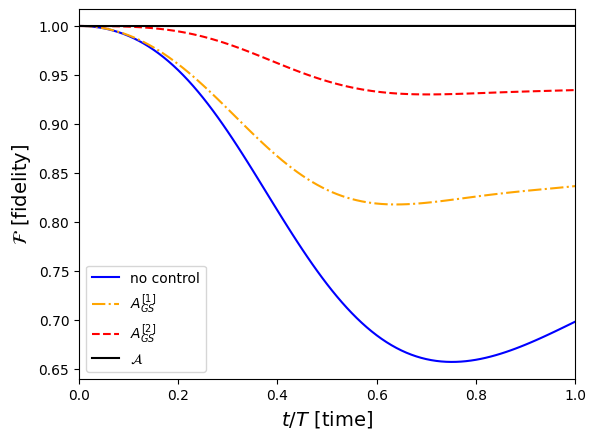

: 

In [ ]:
plt.plot(np.linspace(0,1,101),fid_list,color = 'blue',label = 'no control')
plt.plot(np.linspace(0,1,101),fid_list_eq88,color= 'orange',linestyle = '-.',label = r'$A_{GS}^{[1]}$')
plt.plot(np.linspace(0,1,101),fid_list_eq87,color= 'red',linestyle = '--',label = r'$A_{GS}^{[2]}$')
plt.plot(np.linspace(0,1,101),fid_list_eq89,color= 'k',label = r'$\mathcal{A}$')

plt.ylabel(r'$\mathcal{F}~[\rm{fidelity}] $',fontsize=14)
plt.xlabel(r'$t/T$$~\left[\rm{time}\right]$',fontsize=14)

plt.legend()
plt.xlim(0,1)

plt.show()